<a href="https://colab.research.google.com/github/Noob919/ResearchProject/blob/main/Distribution_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dask
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import dask.dataframe as dd

In [ ]:
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions

In [77]:
cols_to_read = ['Total.Length.of.Bwd.Packets','Fwd.IAT.Min','Down.Up.Ratio']
data  = pd.read_csv("/content/drive/MyDrive/DataResearch/Dataset-Unicauca-Version2-87Atts.csv", usecols=cols_to_read)
data.head()

,Total.Length.of.Bwd.Packets,Fwd.IAT.Min,Down.Up.Ratio
0,110414.0000000000000000,698.0000000000000000,2
1,0.0000000000000000,1.0000000000000000,0
2,0.0000000000000000,0.0000000000000000,0
3,0.0000000000000000,0.0000000000000000,3
4,0.0000000000000000,0.0000000000000000,0


In [80]:
print('Total.Length.of.Bwd.Packets')
print(data['Total.Length.of.Bwd.Packets'].max())
print(data['Total.Length.of.Bwd.Packets'].min())
print('Fwd.IAT.Min')
print(data['Fwd.IAT.Min'].max())
print(data['Fwd.IAT.Min'].min())
print('Down.Up.Ratio')
print(data['Down.Up.Ratio'].max())
print(data['Down.Up.Ratio'].min())

Total.Length.of.Bwd.Packets
1345795830.0
0.0
Fwd.IAT.Min
119999998.0
0.0
Down.Up.Ratio
293
0


**Total.Length.of.Bwd.Packets**

In [83]:
df  = data[data['Total.Length.of.Bwd.Packets'] != 0.0][0:800]

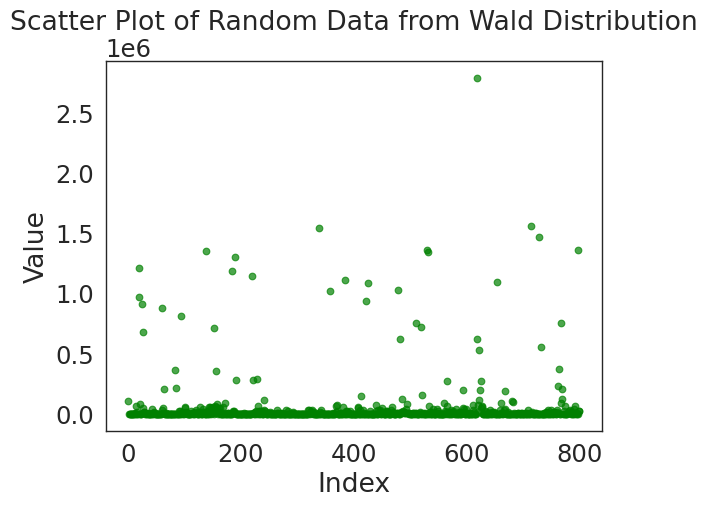

In [117]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(df)+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, df['Total.Length.of.Bwd.Packets'], color='green', alpha=0.7)
plt.title('Scatter Plot of Random Data from Wald Distribution')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


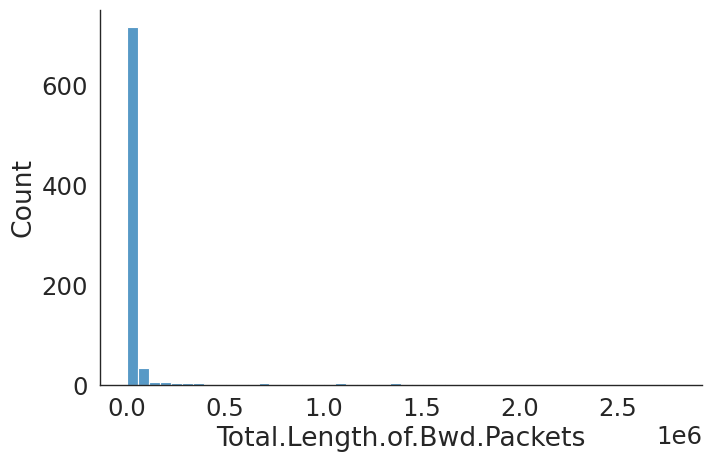

In [86]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Total.Length.of.Bwd.Packets", kind="hist", bins = 50, aspect =1.5)

In [ ]:
f = Fitter(df['Total.Length.of.Bwd.Packets'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [88]:
f.get_best(method = 'sumsquare_error')

{'gibrat': {'loc': -1669.035633399949, 'scale': 7882.757007462232}}

In [89]:
f.fitted_param["gibrat"]

(-1669.035633399949, 7882.757007462232)

In [105]:
from scipy.stats import gibrat

data = []
while len(data) < 800:
    value = np.round(gibrat.rvs(loc = -1669.035633399949, scale = 7882.757007462232))
    if df['Total.Length.of.Bwd.Packets'].min() <= value <= df['Total.Length.of.Bwd.Packets'].max():
        data.append(value)

#data

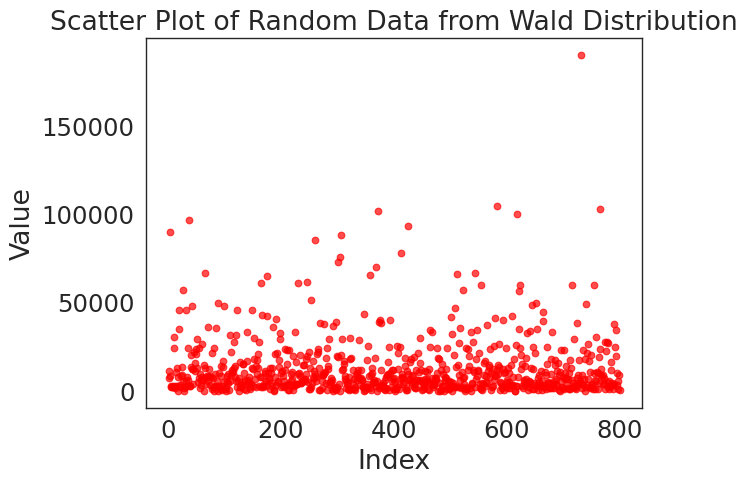

In [119]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(df)+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, data, color='red', alpha=0.7)
plt.title('Scatter Plot of Random Data from Wald Distribution')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

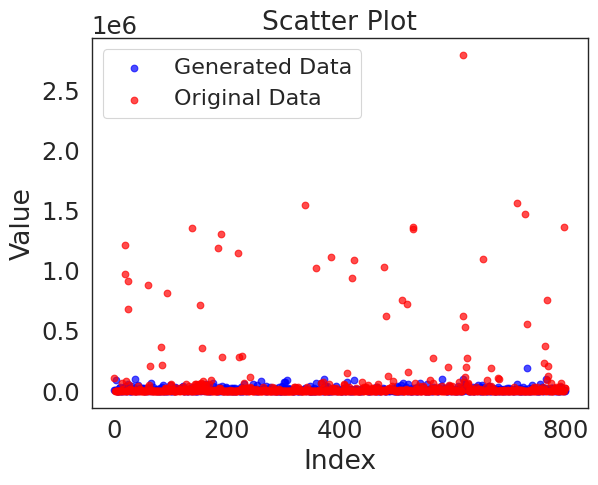

In [121]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(data) + 1)

# Plot a scatter plot of the two columns with different colors
plt.scatter(x_values, data, color='blue', label='Generated Data', alpha=0.7)
plt.scatter(x_values, df['Total.Length.of.Bwd.Packets'], color='red', label='Original Data', alpha=0.7)

plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(fontsize='small')
plt.show()

**Fwd.IAT.Min**

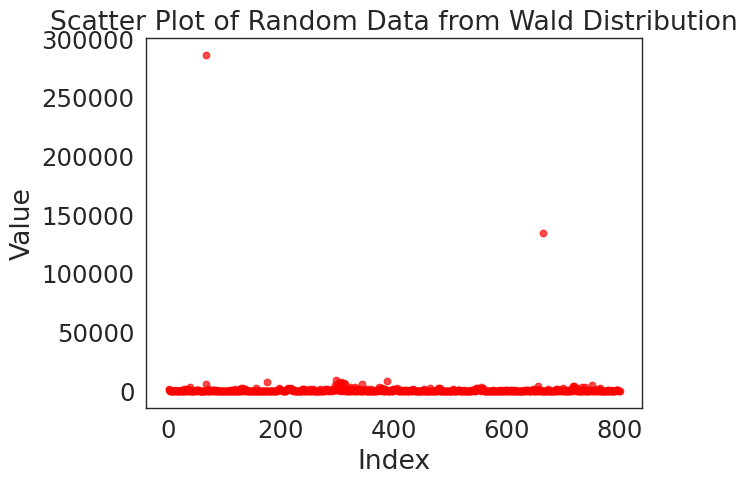

In [128]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(df)+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, df['Fwd.IAT.Min'], color='red', alpha=0.7)
plt.title('Scatter Plot of Random Data from Wald Distribution')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [ ]:
f = Fitter(df['Fwd.IAT.Min'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [130]:
from scipy.stats import genhalflogistic

In [131]:
f.get_best(method = 'sumsquare_error')

{'genhalflogistic': {'c': 3.524318424764161e-05,
  'loc': -0.013785246494218528,
  'scale': 917.8854940853286}}

In [149]:
data = []
while len(data) < 800:
    loc = -0.013785246494218528
    value = np.round(genhalflogistic.rvs(c = 3.524318424764161e-05, scale =917.8854940853286 ))
    if df['Fwd.IAT.Min'].min() <= value <= df['Fwd.IAT.Min'].max():
        data.append(value)

In [ ]:
data

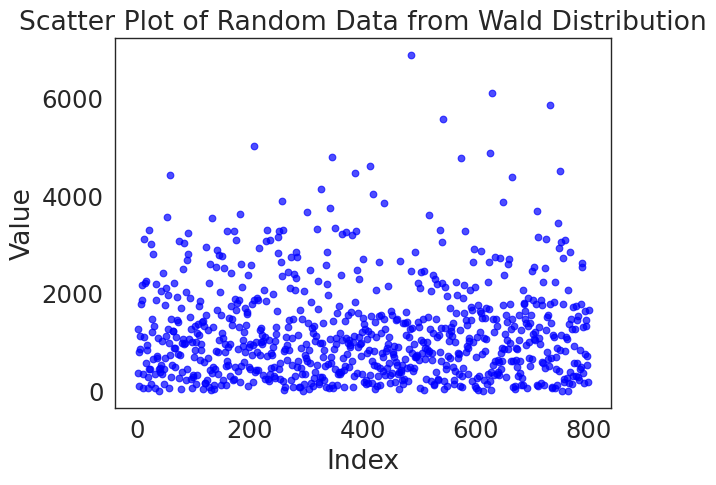

In [152]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(df)+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, data, color='blue', alpha=0.7)
plt.title('Scatter Plot of Random Data from Wald Distribution')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

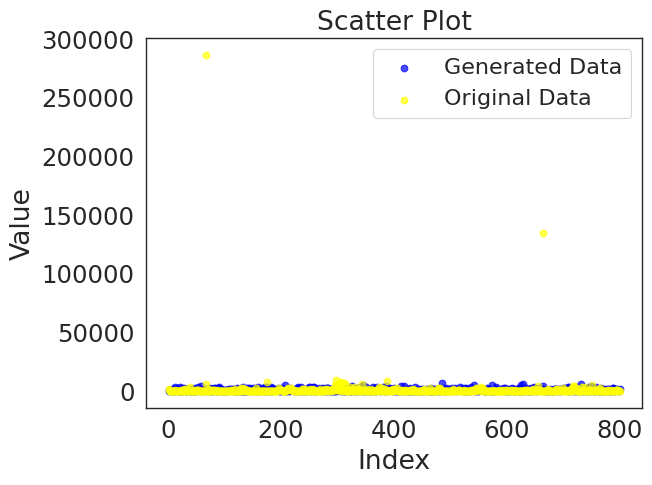

In [153]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(data) + 1)

# Plot a scatter plot of the two columns with different colors
plt.scatter(x_values, data, color='blue', label='Generated Data', alpha=0.7)
plt.scatter(x_values, df['Fwd.IAT.Min'], color='yellow', label='Original Data', alpha=0.7)

plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(fontsize='small')
plt.show()

**Down.Up.Ratio**

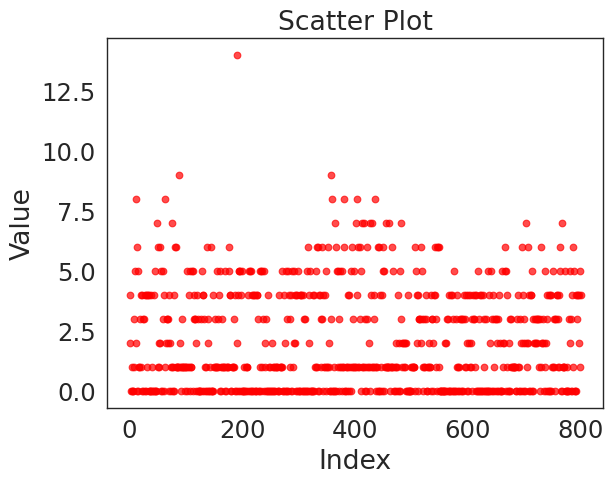

In [154]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(df)+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, df['Down.Up.Ratio'], color='red', alpha=0.7)
plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:4684: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(llc, _a, x)[0]
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3759: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = integrate.quad(llc, x0, x1,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3754: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intgrl = (integrate.quad(llc, x0, mean,
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:3756: IntegrationWarning: The occurrence of rou

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
fisk,5.0561559974827013,1004.5700974756732649,1018.6239326586770630,inf,0.5282264397769068,0.0000000000000000
levy,5.4982866026667825,939.8465429776168776,949.2157664329527051,inf,0.4649866923314038,0.0000000000000000
truncweibull_min,5.5476337633519455,694.6214091415147323,718.0444677798543580,inf,0.3149999750390926,0.0000000000000000
gengamma,5.5796553052471092,919.2458074349763137,937.9842543456479689,inf,0.4465305560580238,0.0000000000000000
gamma,5.5870568740816564,1373.9082764859813324,1387.9621116689850169,inf,0.5368453862647931,0.0000000000000000


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


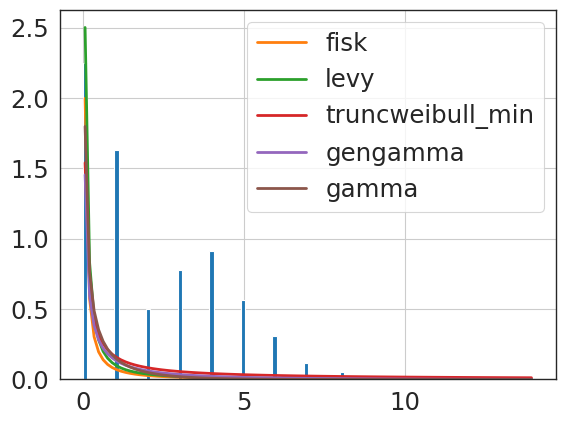

In [155]:
f = Fitter(df['Down.Up.Ratio'],
           distributions= get_distributions())
f.fit()
pd.options.display.float_format = '{:.16f}'.format
f.summary()

In [156]:
from scipy.stats import fisk

In [157]:
f.get_best(method = 'sumsquare_error')

{'fisk': {'c': 0.5643710711264205,
  'loc': -1.1689118201127976e-25,
  'scale': 0.050738209641121454}}

In [160]:
data = []
while len(data) < 800:
    value = np.round(fisk.rvs(c = 0.5643710711264205, loc=-1.1689118201127976e-25, scale=0.050738209641121454))
    if df['Down.Up.Ratio'].min() <= value <= df['Down.Up.Ratio'].max():
        data.append(value)

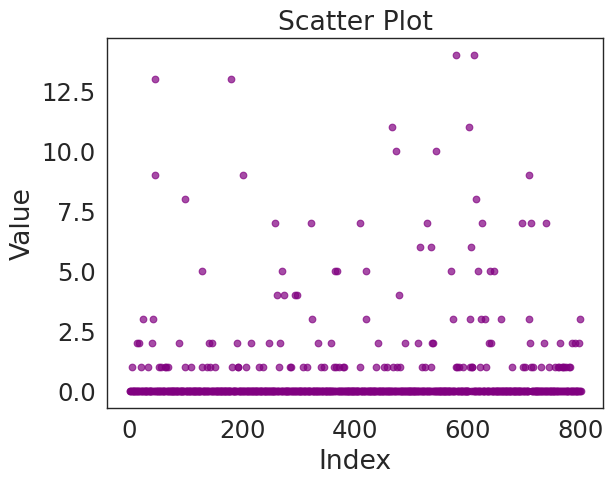

In [162]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(df)+1)

# Plot a scatter plot of the generated data
plt.scatter(x_values, data, color='purple', alpha=0.7)
plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


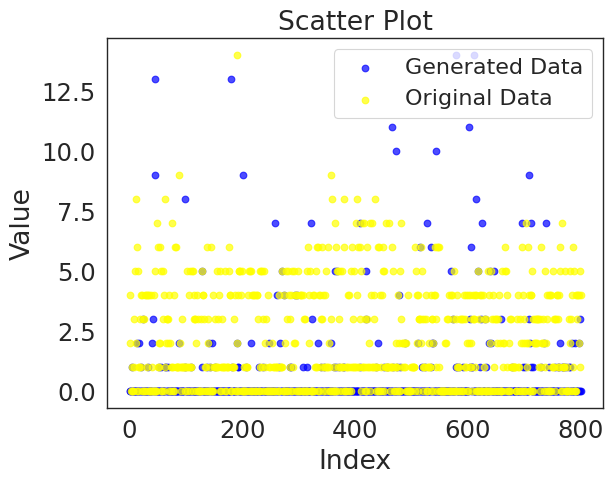

In [163]:
# Generate x values (e.g., indices)
x_values = np.arange(1, len(data) + 1)

# Plot a scatter plot of the two columns with different colors
plt.scatter(x_values, data, color='blue', label='Generated Data', alpha=0.7)
plt.scatter(x_values, df['Down.Up.Ratio'], color='yellow', label='Original Data', alpha=0.7)

plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(fontsize='small')
plt.show()